# FASHION MNIST CLASSIFICATION MODEL

Fashion mnist is a dataset from tensorflow.

* It consists of **60000** images for **trainig** and **10000** image for **testing** of various clothing types.
* Various categories of the clothings are : **T-shirt/top,
Trouser,
Pullover,
Dress,
Coat,
Sandal,
Shirt,
Sneaker,
Bag,
Ankle boot**

## Importing the required libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

## Loading the dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Visualizing our dataset

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Take the class names from this github link : https://github.com/zalandoresearch/fashion-mnist

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot',]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

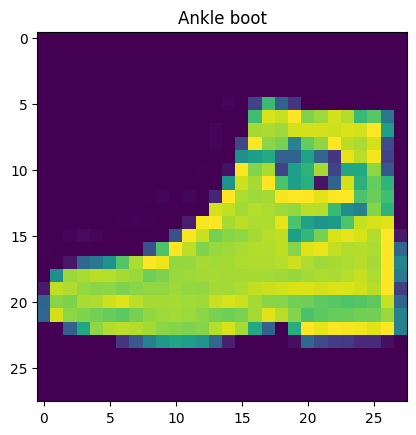

In [ ]:
# Displaying random images of our dataset
import random

choice = random.randint(1,60000)
plt.imshow(x_train[choice])
cloth = class_names[y_train[choice]]
plt.title(cloth)

## Model 1


Some main changes while modeling a **multi class classification** model:
* We have to use **softmax** as the activation function for output layer of the model.
* **SparseCategoricalCrossentropy** is used for the data which is not yet one hot encoded. After one hot encoding you can use **CategoricalCrossentropy**
* While working with image dataset, we have to flatten our input shape into a linear.

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #We use it to convert our input shape into (784,1)
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer =tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

history_1 = model_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 16.8167 - accuracy: 0.7429
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 12.3942 - accuracy: 0.7893
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 11.6458 - accuracy: 0.7969
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.6544 - accuracy: 0.7993
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.3798 - accuracy: 0.8028
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 10.1605 - accuracy: 0.8048
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.9423 - accuracy: 0.8054
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.9132 - accuracy: 0.8077
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.0331 - accuracy: 0.8061
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss

### Evaluationg model 1

In [ ]:
evaluate_history = model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 17.4181 - accuracy: 0.7613


We are getting a **76% accuracy**, which is good, but how to increase it.
We can **normalize** our dataset, it will make easy for the model to classify the dataset, and to find pattens

## Model 2 : Normalized Data

In [ ]:
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

x_train_norm.max(), x_train_norm.min()

(1.0, 0.0)

Thus, we converted our data into the range of 0,1.

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer =tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

history_2 = model_2.fit(x_train_norm, y_train, epochs=10, validation_data=(x_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5960 - accuracy: 0.8002 - val_loss: 0.5031 - val_accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4611 - accuracy: 0.8422 - val_loss: 0.5052 - val_accuracy: 0.8269
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4361 - accuracy: 0.8494 - val_loss: 0.4781 - val_accuracy: 0.8275
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4211 - accuracy: 0.8550 - val_loss: 0.4562 - val_accuracy: 0.8394
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4140 - accuracy: 0.8566 - val_loss: 0.4618 - val_accuracy: 0.8386
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4071 - accuracy: 0.8586 - val_loss: 0.4623 - val_accuracy: 0.8366
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4023 - accuracy: 0.8616 - val_loss: 0.4638 - val_accuracy:

In [ ]:
model_2.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.8444


[0.45073452591896057, 0.8443999886512756]

As you can see by just normalizing our dataset we can increase our accuracy. Our accuracy is increased to **84%** from 76%.

In [ ]:
y_pred = model_2.predict(x_test_norm)
y_pred

313/313 [==============================] - 1s 1ms/step


array([[5.8513416e-07, 1.4200986e-08, 1.4111743e-05, ..., 5.4254651e-02,
        9.4241723e-03, 7.2675580e-01],
       [1.6921856e-03, 7.8083090e-08, 9.2949057e-01, ..., 6.1819804e-28,
        3.4145683e-05, 9.5533984e-18],
       [7.1981180e-05, 9.9985456e-01, 5.7769676e-06, ..., 6.2877236e-16,
        9.3995411e-08, 9.1444810e-13],
       ...,
       [1.1098376e-01, 2.5083480e-06, 2.2876970e-03, ..., 2.6123068e-06,
        6.3111275e-01, 2.8612510e-08],
       [2.7132176e-06, 9.9932200e-01, 1.8859567e-06, ..., 1.6806341e-12,
        5.1815487e-08, 4.8642455e-08],
       [3.5300211e-05, 7.4646600e-06, 2.9576215e-04, ..., 1.5094532e-02,
        7.2355629e-03, 3.1428188e-04]], dtype=float32)

In [ ]:
y_pred_label = y_pred.argmax(axis=-1)
y_pred_label

array([9, 2, 1, ..., 8, 1, 5])

### Visualizng Confusion Matrix

Visualizing the predictions of our model

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_pred_label)

array([[871,   1,  11,  51,   7,   0,  47,   0,  12,   0],
       [  4, 951,   4,  31,   5,   0,   3,   0,   2,   0],
       [ 33,   2, 715,  15, 165,   1,  59,   0,  10,   0],
       [ 43,   8,   6, 895,  27,   0,  17,   0,   4,   0],
       [  1,   1,  85,  47, 802,   0,  56,   0,   8,   0],
       [  0,   0,   0,   1,   0, 929,   0,  47,   4,  19],
       [214,   1, 121,  49, 144,   0, 451,   0,  20,   0],
       [  0,   0,   0,   0,   0,  35,   0, 938,   0,  27],
       [  9,   1,   6,  13,   5,   4,  12,   4, 946,   0],
       [  0,   0,   0,   0,   0,  16,   1,  37,   0, 946]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def display_confusion_matrix(actual, predicted):

  cm_matrix = confusion_matrix(actual, predicted)

  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = class_names)

  fig, ax = plt.subplots(figsize=(11,11))
  cm_display.plot(ax=ax, cmap=plt.cm.Blues)

  plt.show()


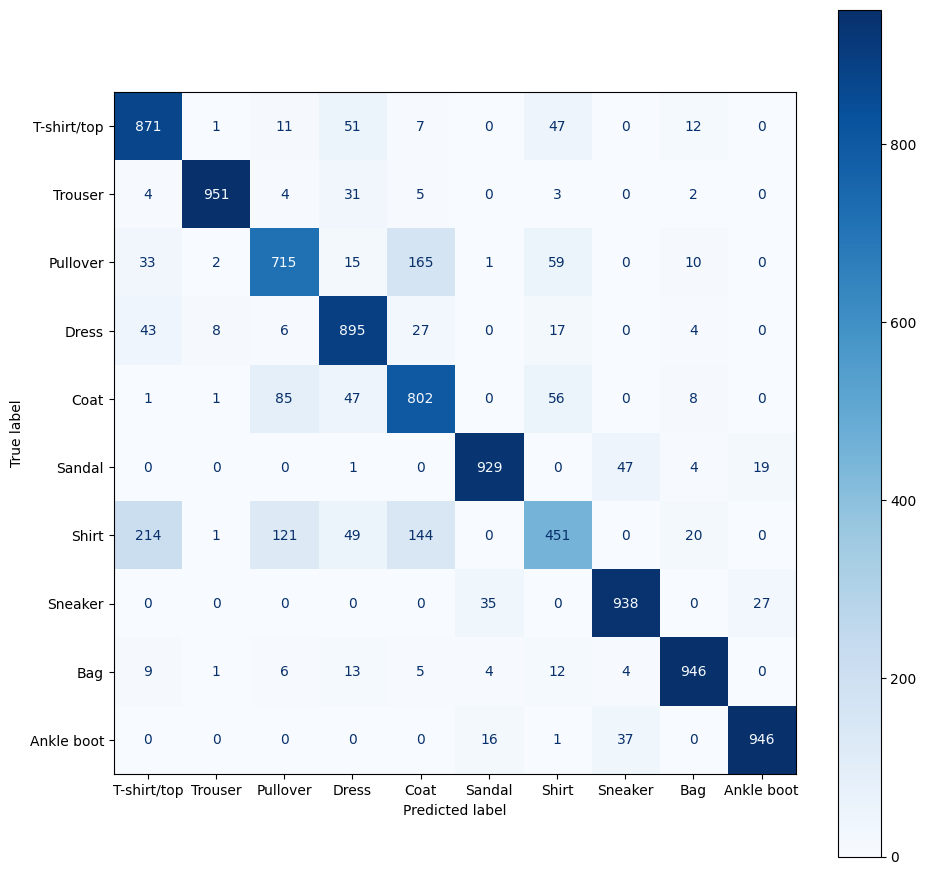

In [ ]:
display_confusion_matrix(y_test, y_pred_label)

## Model 3

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(35, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy'],
)

model_3.fit(x_train_norm, y_train, epochs=20, validation_data=(x_test_norm, y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6075 - accuracy: 0.7844 - val_loss: 0.4764 - val_accuracy: 0.8289
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4162 - accuracy: 0.8511 - val_loss: 0.4737 - val_accuracy: 0.8351
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3759 - accuracy: 0.8664 - val_loss: 0.4362 - val_accuracy: 0.8406
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3533 - accuracy: 0.8738 - val_loss: 0.4037 - val_accuracy: 0.8531
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3369 - accuracy: 0.8777 - val_loss: 0.4141 - val_accuracy: 0.8529
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3215 - accuracy: 0.8820 - val_loss: 0.3931 - val_accuracy: 0.8597
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3140 - accuracy: 0.8856 - val_loss: 0.3880 - val_accuracy

In [ ]:
y_pred_2 = model_3.predict(x_test).argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


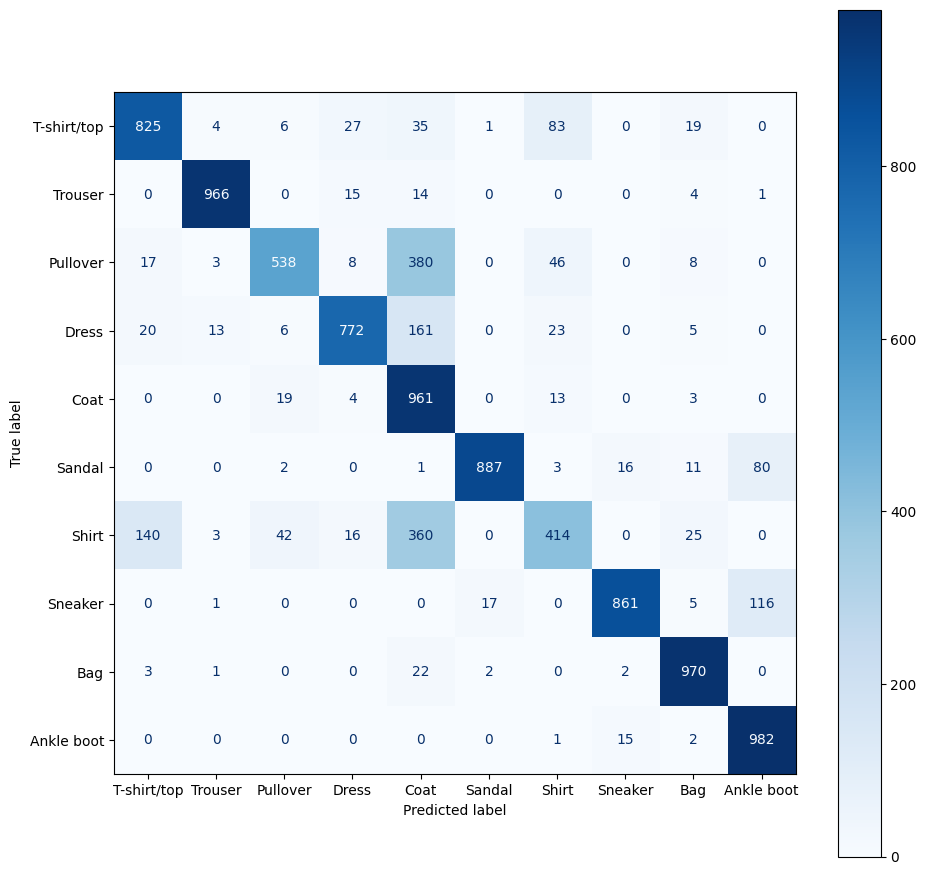

In [ ]:
display_confusion_matrix(y_test, y_pred_2)